# `nb04`: Plots

# Plotting in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

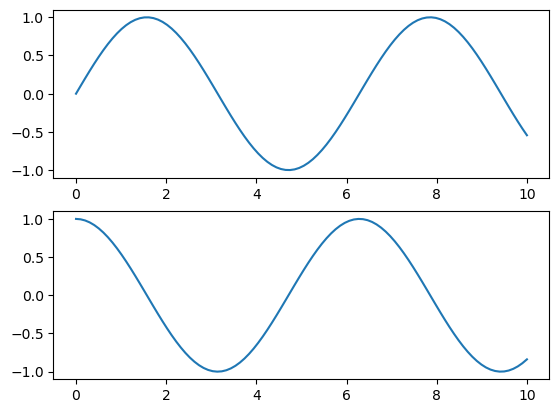

In [2]:
# MATLAB-style interface
plt.figure()
x = np.linspace(0, 10, 100)

plt.subplot(2, 1, 1)     # first panel
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)     # second panel
plt.plot(x, np.cos(x))
plt.show()

<div class="alert alert-danger">
    
This interface is stateful. It keeps track of the current figure and axes, which are where all `plt` commands are applied. The current figure and axes can be retrieved with `plt.gcf()` and `plt.gca()`.
    
</div>

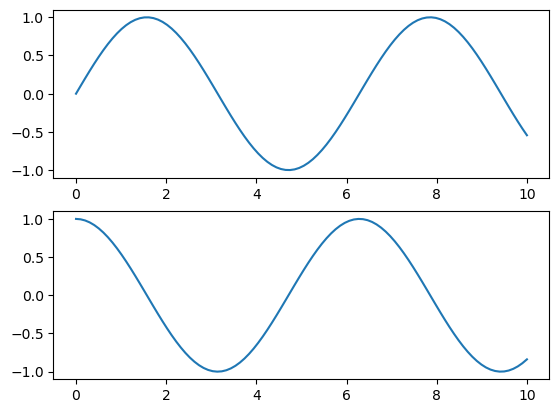

In [3]:
# Object-oriented interface
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

plt.show()

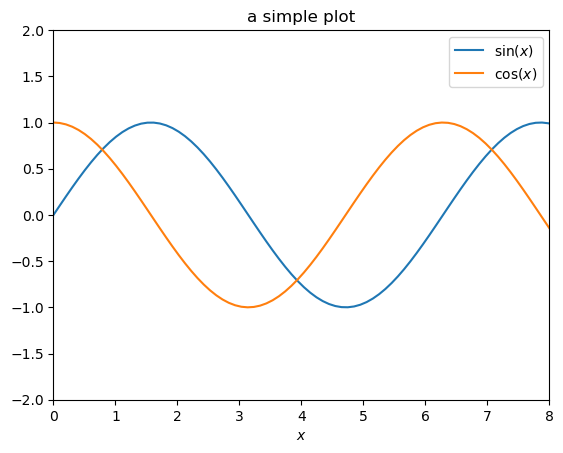

In [4]:
# Line plot
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x), label=r"$\sin(x)$")  # check ax.plot?
ax.plot(x, np.cos(x), label=r"$\cos(x)$")
ax.set(xlim=(0, 8), ylim=(-2, 2), xlabel=r"$x$", title="a simple plot")
ax.legend()

plt.show()

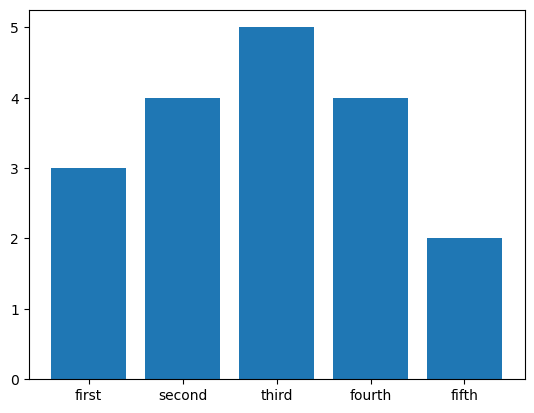

In [5]:
# Bar plots
fig = plt.figure()
ax = plt.axes()

x = [3, 4, 5, 4, 2]
ax.bar(["first", "second", "third", "fourth", "fifth"], x)

plt.show()

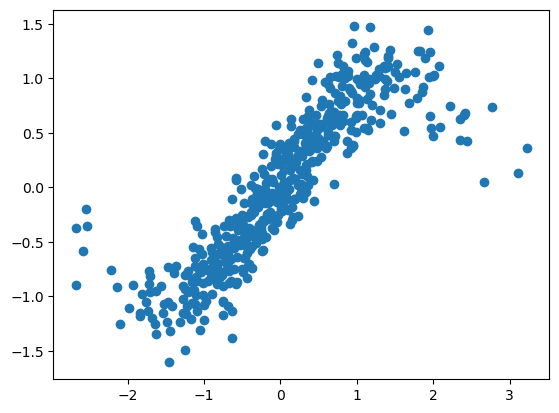

In [6]:
# Scatter plot
fig = plt.figure()
ax = plt.axes()

x = np.random.randn(500)
y = np.sin(x) + 0.25 * np.random.randn(*x.shape)
ax.scatter(x, y)

plt.show()

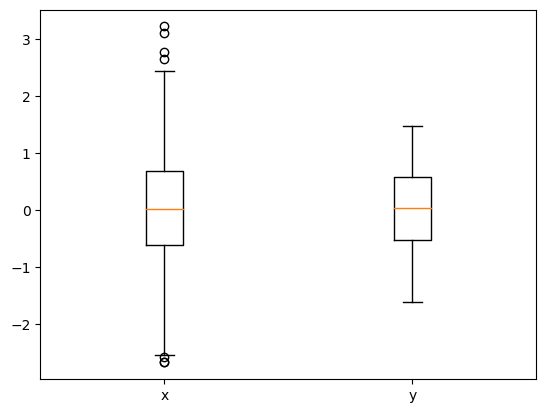

In [7]:
# Boxplot
fig = plt.figure()
ax = plt.axes()

ax.boxplot([x, y], labels=["x", "y"])

plt.show()

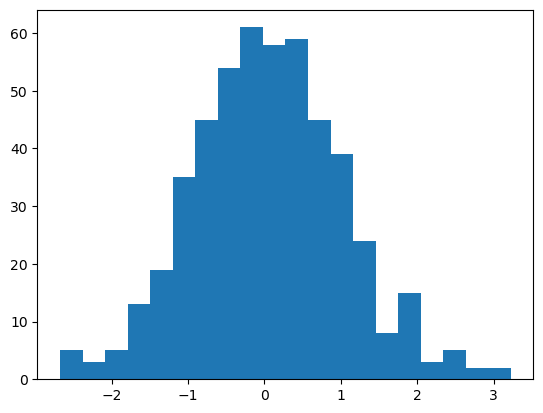

In [8]:
# Histograms
fig = plt.figure()
ax = plt.axes()

ax.hist(x, bins=20)

plt.show()

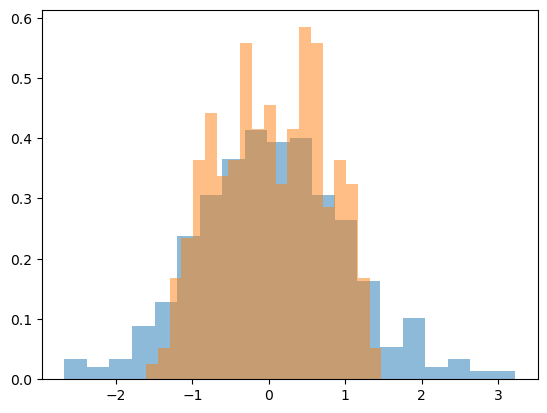

In [9]:
fig = plt.figure()
ax = plt.axes()

kwargs = dict(bins=20, alpha=0.5, density=True)

ax.hist(x, **kwargs)
ax.hist(y, **kwargs)

plt.show()

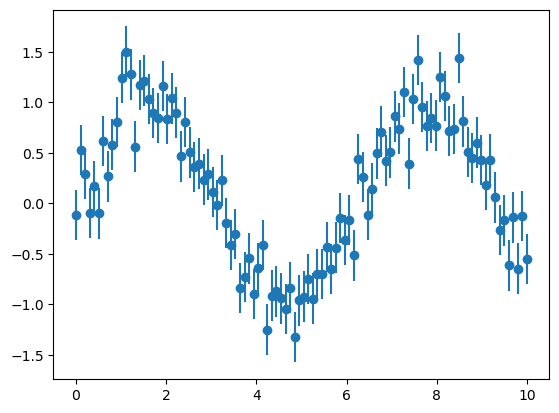

In [10]:
# Error bars
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 100)
dy = 0.25
y = np.sin(x) + dy * np.random.randn(*x.shape)
ax.errorbar(x, y, yerr=dy, fmt="o")

plt.show()

In [11]:
# Save figure
fig.savefig("myplot.pdf")

<div class="alert alert-success">
    
**Exercice**. Reproduce the plot below of Belgian COVID-19 daily cases using [this data](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv).
    
</div>

<img src="./figures/nb04/covid-plot.png" />

# Data visualization principles

## Encoding data using visual cues

Whenever we visualize, data is encoded using visual cues. It is mapped onto variations in size, shape, color, area, angle, etc.

<img src="./figures/nb04/cues1.jpg" width="30%" />

These cues, however, are not perceived equally well across people (Cleveland and McGill, 1980). 

<img src="./figures/nb04/cues2.jpg" width="30%" />

(Figures reproduced from [Peter Aldhous, 2019](https://paldhous.github.io/ucb/2019/dataviz/week2.html).)

<div class="alert alert-danger">
    
For numerical quantities, **positions** and **lengths** are perceived the most accurately. 
For categorical values, **shapes** are perceived the most accurately.
   
</div>

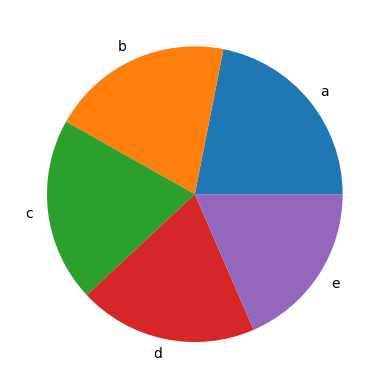

In [12]:
fig = plt.figure()
ax = plt.axes()

x = np.ones(5) + 0.075*np.random.randn(5)
labels = ["a", "b", "c", "d", "e"]
ax.pie(x, labels=labels)

plt.show()

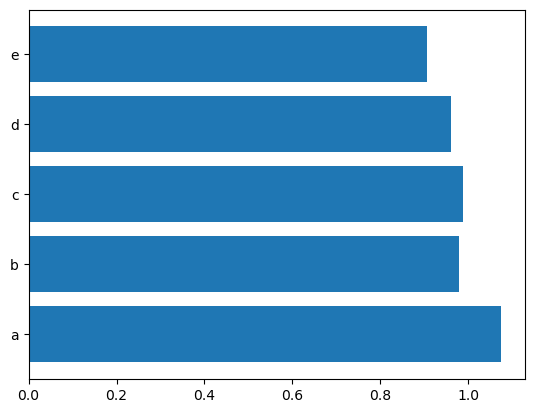

In [13]:
# Using lengths
fig = plt.figure()
ax = plt.axes()

ax.barh(labels, width=x)

plt.show()

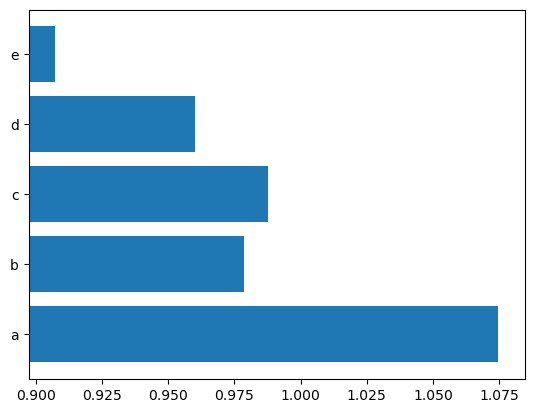

In [14]:
# Using positions
fig = plt.figure()
ax = plt.axes()

ax.barh(labels, width=x)
ax.set(xlim=(np.min(x)-0.01, np.max(x)+0.01))

plt.show()

## Show the data

In [15]:
# Summaries vs. data
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = np.array([(x, y1), (x, y2), (x, y3), (x4, y4)])

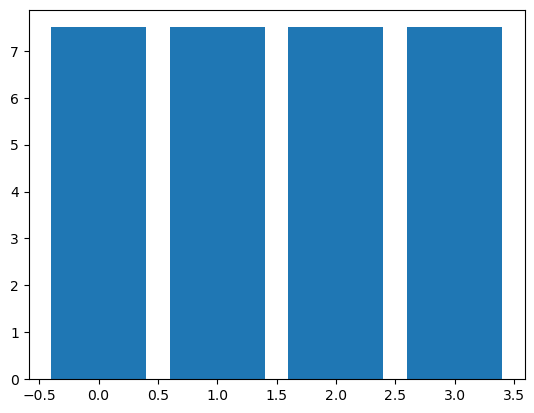

In [16]:
fig = plt.figure()
ax = plt.axes()

ax.bar(range(4), height=np.mean(datasets[:, 1, :], axis=1))

plt.show()

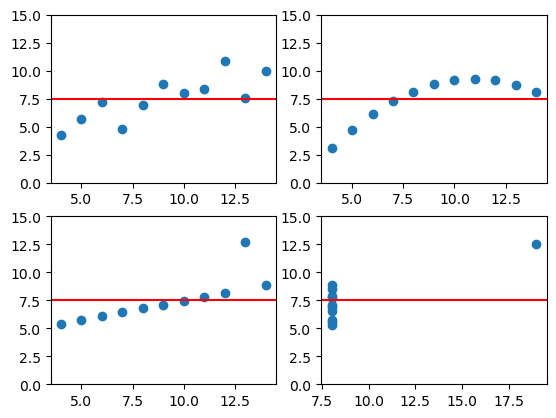

In [17]:
fig, axs = plt.subplots(2, 2)

for n, (i, j) in enumerate([(0, 0), (0, 1), (1, 0), (1, 1)]):
    axs[i, j].scatter(datasets[n, 0], datasets[n, 1])
    axs[i, j].axhline(np.mean(datasets[n, 1]), color="r")
    axs[i, j].set(ylim=(0, 15))
    
plt.show()

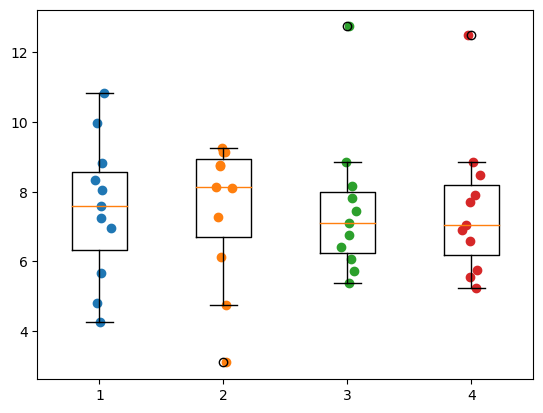

In [18]:
# A mix of both summaries and data
fig = plt.figure()
ax = plt.axes()

ax.boxplot(datasets[:, 1].T)
for i in range(4):
    y = datasets[i, 1]
    ax.scatter(np.random.normal(i+1, 0.04, size=len(y)), y)

plt.show()

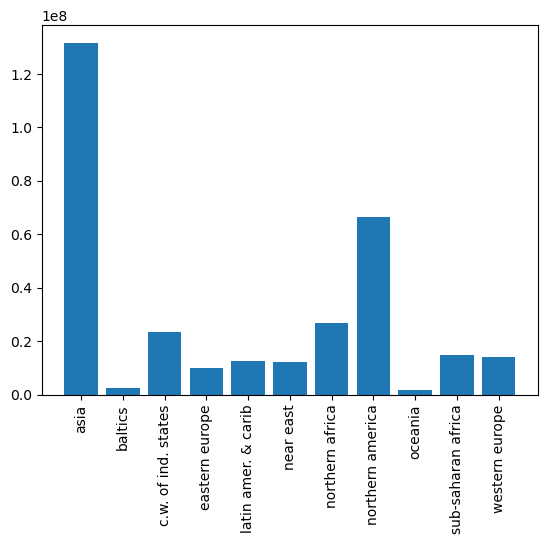

In [19]:
# Another example
df = pd.read_csv("data/countries.csv")
regions = df.groupby("Region")["Population"].mean()
labels = [r.strip().lower() for r in regions.index]

fig = plt.figure()
ax = plt.axes()
ax.bar(range(len(labels)), height=regions.values)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.show()

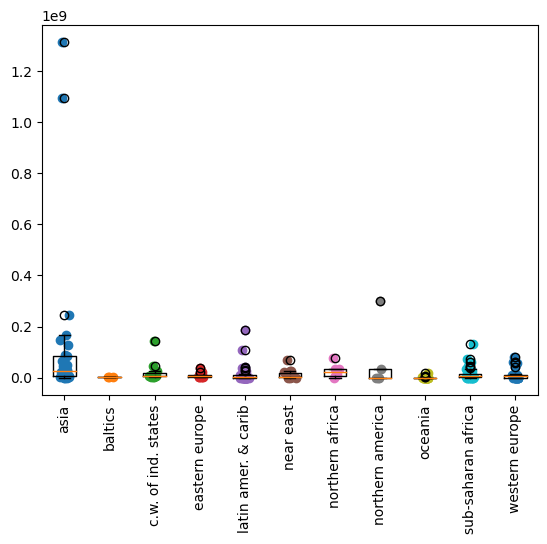

In [20]:
df = pd.read_csv("data/countries.csv")

fig = plt.figure()
ax = plt.axes()

for i, (r, s) in enumerate(df.groupby("Region")["Population"]):
    r = r.strip().lower()
    ax.scatter(np.random.normal(i+1, 0.05, size=len(s)), s)

ax.boxplot([s for _, s in df.groupby("Region")["Population"]])

plt.xticks(range(1, len(labels)+1), labels, rotation=90)
plt.show()

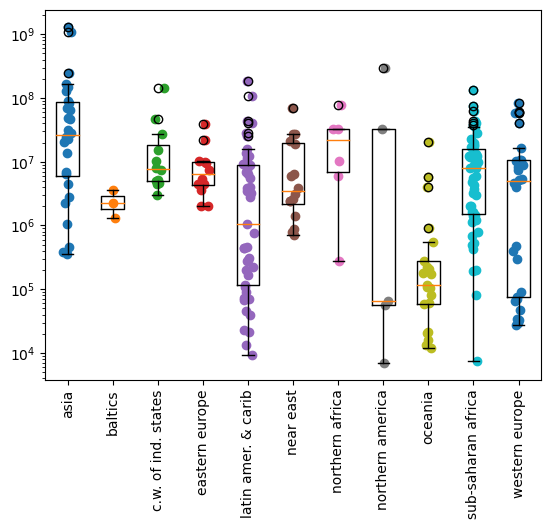

In [21]:
# Log-transform
df = pd.read_csv("data/countries.csv")

fig = plt.figure()
ax = plt.axes()

for i, (r, s) in enumerate(df.groupby("Region")["Population"]):
    r = r.strip().lower()
    ax.scatter(np.random.normal(i+1, 0.05, size=len(s)), s)

ax.boxplot([s for _, s in df.groupby("Region")["Population"]])

ax.set(yscale="log")
plt.xticks(range(1, len(labels)+1), labels, rotation=90)
plt.show()

## Ease comparisons

In [22]:
df = pd.read_csv("data/weight-height.csv")
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


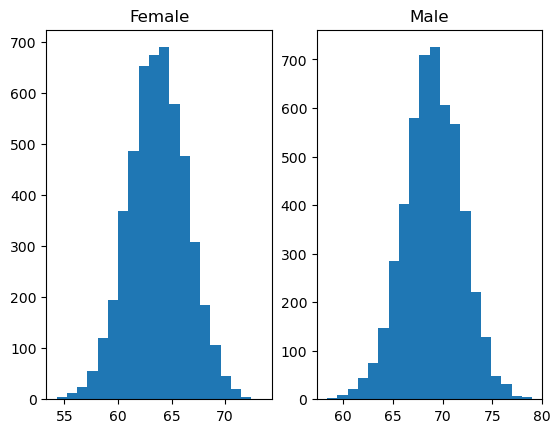

In [23]:
fig, axs = plt.subplots(1, 2)

groups = [(g, s) for g, s in df.groupby("Gender")["Height"]]

for i, (g, s) in enumerate(groups):
    axs[i].hist(s, bins=20)
    axs[i].set(title=g)

plt.show()

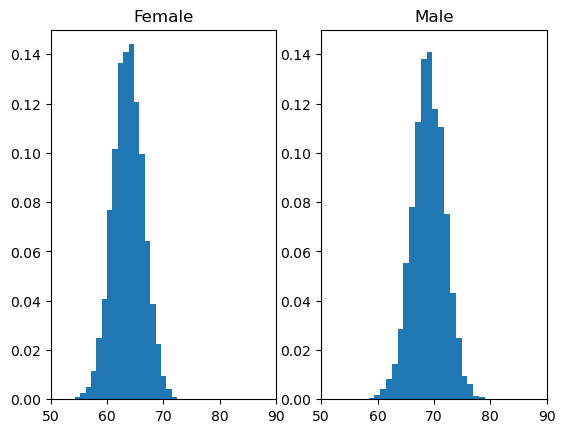

In [24]:
# Use common axes
fig, axs = plt.subplots(1, 2)

groups = [(g, s) for g, s in df.groupby("Gender")["Height"]]

for i, (g, s) in enumerate(groups):
    axs[i].hist(s, bins=20, density=True)
    axs[i].set(title=g, xlim=(50, 90), ylim=(0, 0.15))
    
plt.show()

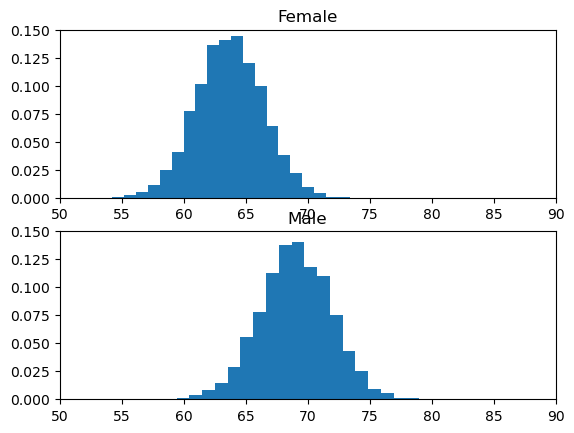

In [25]:
# Align plots
# (vertically to see horizontal changes and vice-versa)
fig, axs = plt.subplots(2, 1)

groups = [(g, s) for g, s in df.groupby("Gender")["Height"]]

for i, (g, s) in enumerate(groups):
    axs[i].hist(s, bins=20, density=True)
    axs[i].set(title=g, xlim=(50, 90), ylim=(0, 0.15))
    
plt.show()

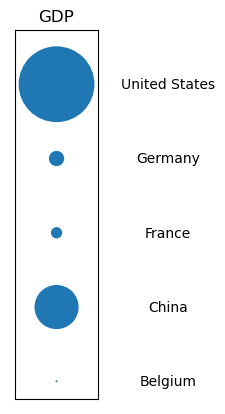

In [26]:
# Don't distort quantities
df = pd.read_csv("data/countries.csv")
df = df.query("Country in ('United States', 'China', 'Germany', 'France', 'Belgium')")

labels = df["Country"].values
values = (df["GDP"] * df["Population"]).values
values /= np.sum(values)

fig = plt.figure()
ax = plt.axes()

for i in range(len(labels)):
    circ = plt.Circle((0, i), radius=values[i])
    ax.add_patch(circ)
    ax.text(1.5, i, labels[i], horizontalalignment='center', verticalalignment='center')

ax.set(aspect="equal", xticks=[], yticks=[], title="GDP")
ax.autoscale_view()
plt.show()

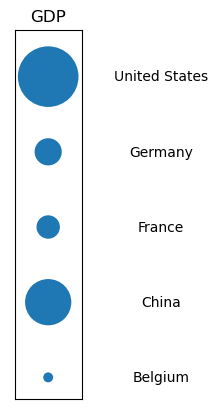

In [27]:
fig = plt.figure()
ax = plt.axes()

for i in range(len(labels)):
    circ = plt.Circle((0, i), radius=(values[i] / np.pi) ** 0.5)
    ax.add_patch(circ)
    ax.text(1.5, i, labels[i], horizontalalignment='center', verticalalignment='center')

ax.set(aspect="equal", xticks=[], yticks=[], title="GDP")
ax.autoscale_view()
plt.show()

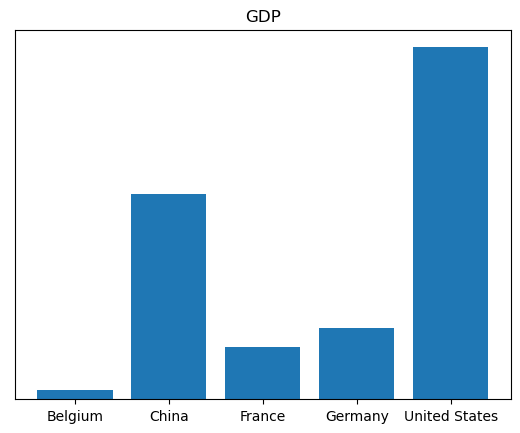

In [28]:
fig = plt.figure()
ax = plt.axes()

ax.bar(labels, values)

ax.set(title="GDP", yticks=[])
plt.show()

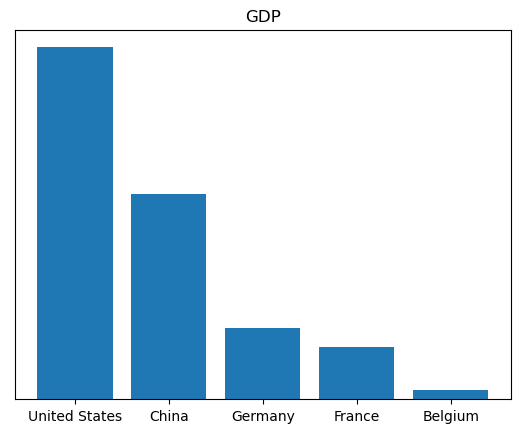

In [29]:
# Sort on a meaningful variable
fig = plt.figure()
ax = plt.axes()

ind = np.argsort(values)[::-1]
ax.bar(labels[ind], values[ind])

ax.set(title="GDP", yticks=[])
plt.show()

## Use colors effectively

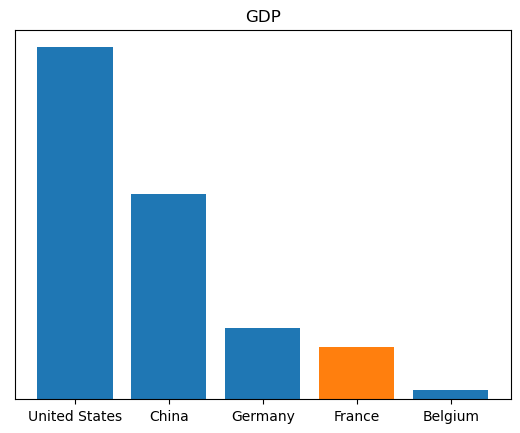

In [30]:
df = pd.read_csv("data/countries.csv")
df = df.query("Country in ('United States', 'China', 'Germany', 'France', 'Belgium')")

labels = df["Country"].values
values = (df["GDP"] * df["Population"]).values
values /= np.sum(values)

fig = plt.figure()
ax = plt.axes()

ind = np.argsort(values)[::-1]
ax.bar(labels[ind], values[ind], color=["C0", "C0", "C0", "C1", "C0"])

ax.set(title="GDP", yticks=[])
plt.show()

## Prefer labels over legends

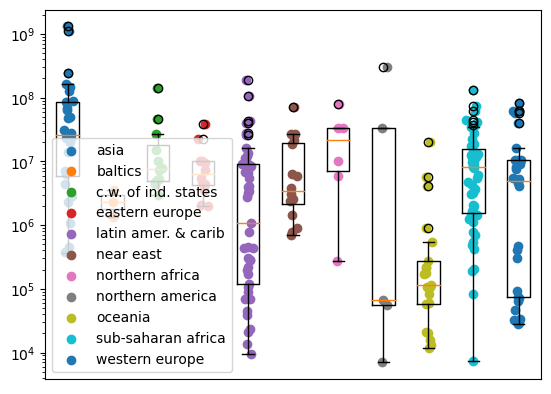

In [38]:
df = pd.read_csv("data/countries.csv")
regions = df.groupby("Region")["Population"].mean()
labels = [r.strip().lower() for r in regions.index]

fig = plt.figure()
ax = plt.axes()

for i, (r, s) in enumerate(df.groupby("Region")["Population"]):
    r = r.strip().lower()
    ax.scatter(np.random.normal(i+1, 0.05, size=len(s)), s, label=r)

ax.boxplot([s for _, s in df.groupby("Region")["Population"]])

ax.set(yscale="log", xticks=[])
ax.legend()
plt.show()

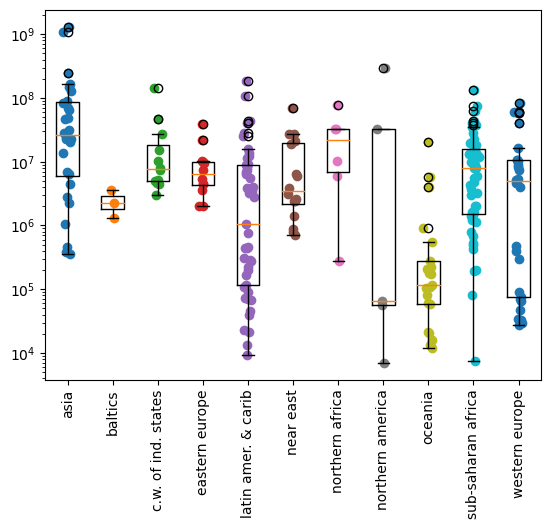

In [40]:
df = pd.read_csv("data/countries.csv")
regions = df.groupby("Region")["Population"].mean()
labels = [r.strip().lower() for r in regions.index]

fig = plt.figure()
ax = plt.axes()

for i, (r, s) in enumerate(df.groupby("Region")["Population"]):
    r = r.strip().lower()
    ax.scatter(np.random.normal(i+1, 0.05, size=len(s)), s)

ax.boxplot([s for _, s in df.groupby("Region")["Population"]])

ax.set(yscale="log", xticks=[])
plt.xticks(range(1, len(labels)+1), labels, rotation=90)
plt.show()

## Choosing the right graph (Jean-Luc Doumont)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("6lm4wJ1qm0w")

# Wrap-up exercises

<div class="alert alert-success">
    
**Exercice**. Discuss Figure 1 and Figure 2 of [Canziani et al, 2016](https://arxiv.org/pdf/1605.07678.pdf).
    
</div>

<div class="alert alert-success">
    
**Exercice**. Take one of your past reports and revisit one of its plots.
    
</div>